In [3]:
#importazione librerie
import matplotlib.pyplot as plt
import pandas as pd 
import networkx as nx
import seaborn as sns

C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_13052\2933309972.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Lettura DataSet

In [4]:
df_classes = pd.read_csv("elliptic_txs_classes.csv")
df_edgelist = pd.read_csv("elliptic_txs_edgelist.csv")
df_features = pd.read_csv("elliptic_txs_features.csv")


EDA

In [8]:
df_classes.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [9]:
df_edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [10]:
df_features.head()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [14]:
df_classes['class'].value_counts()

class
unknown    157205
licit       42019
illicit      4545
Name: count, dtype: int64

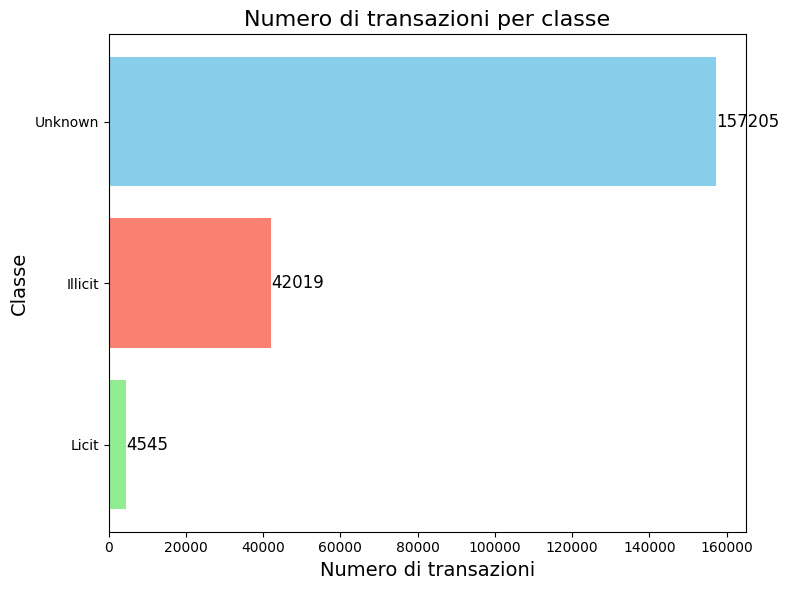

In [46]:
# sostituzione valori 1 e 2 con il tipo di transizioni e iniziamo una prima visualizzazione per avere una visione più ampia del problema
df_classes['class'] = df_classes['class'].replace({'1': 'illicit', '2': 'licit'})
df_classes['class'].value_counts()

# Raggruppa le classi e conta il numero di transazioni per ciascuna classe
class_counts = df_classes.groupby('class').count()['txId'].values

# Etichette per le classi
class_labels = ['Licit', 'Illicit', 'Unknown']

# Creazione del grafico
plt.figure(figsize=(8, 6))
colors = ['lightgreen', 'salmon', 'skyblue']
classes_figure = plt.barh(class_labels, class_counts, color=colors)

# Aggiungi titolo e label
plt.title('Numero di transazioni per classe', fontsize=16)
plt.xlabel('Numero di transazioni', fontsize=14)
plt.ylabel('Classe', fontsize=14)

# Aggiungi valori numerici sopra le barre
for i, v in enumerate(class_counts):
    plt.text(v + 50, i, str(v), color='black', va='center', fontsize=12)

# Mostra il grafico
plt.tight_layout()
plt.show()

In [16]:
df_features.shape, df_classes.shape, df_edgelist.shape

((203768, 167), (203769, 2), (234355, 2))

In [17]:
df_features.columns = ['txId', 'Time step'] + [f'local_feature_{i}' for i in range(93)] + [f'aggregate_feature_{i}' for i in range(72)]
df_features.describe().T


,count,mean,std,min,25%,50%,75%,max
txId,203768.0,1.711307e+08,1.104656e+08,1076.000000,8.433451e+07,1.624374e+08,2.454798e+08,4.032446e+08
Time step,203768.0,2.384407e+01,1.517212e+01,1.000000,9.000000e+00,2.300000e+01,3.800000e+01,4.900000e+01
local_feature_0,203768.0,8.414927e-07,1.000005e+00,-0.172983,-1.725317e-01,-1.692045e-01,-1.318532e-01,7.168197e+01
local_feature_1,203768.0,9.062637e-07,1.000005e+00,-0.210553,-1.803266e-01,-1.328975e-01,-5.524241e-02,7.359505e+01
local_feature_2,203768.0,5.895768e-06,1.000001e+00,-1.756361,-1.201369e+00,4.636092e-01,1.018602e+00,2.683580e+00
...,...,...,...,...,...,...,...,...
aggregate_feature_67,203768.0,4.293616e-07,1.000005e+00,-0.125939,-8.749016e-02,-8.749016e-02,-8.749016e-02,2.518490e+02
aggregate_feature_68,203768.0,6.436502e-07,1.000005e+00,-0.131155,-1.311553e-01,-1.311553e-01,-8.467423e-02,2.387835e+02
aggregate_feature_69,203768.0,4.786011e-07,1.000005e+00,-0.269818,-1.405971e-01,-9.752359e-02,-9.752359e-02,1.057340e+02
aggregate_feature_70,203768.0,5.919153e-07,1.000005e+00,-1.760926,-1.206134e-01,-1.206134e-01,1.520490e-01,1.519700e+00


In [18]:
df_features["Time step"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

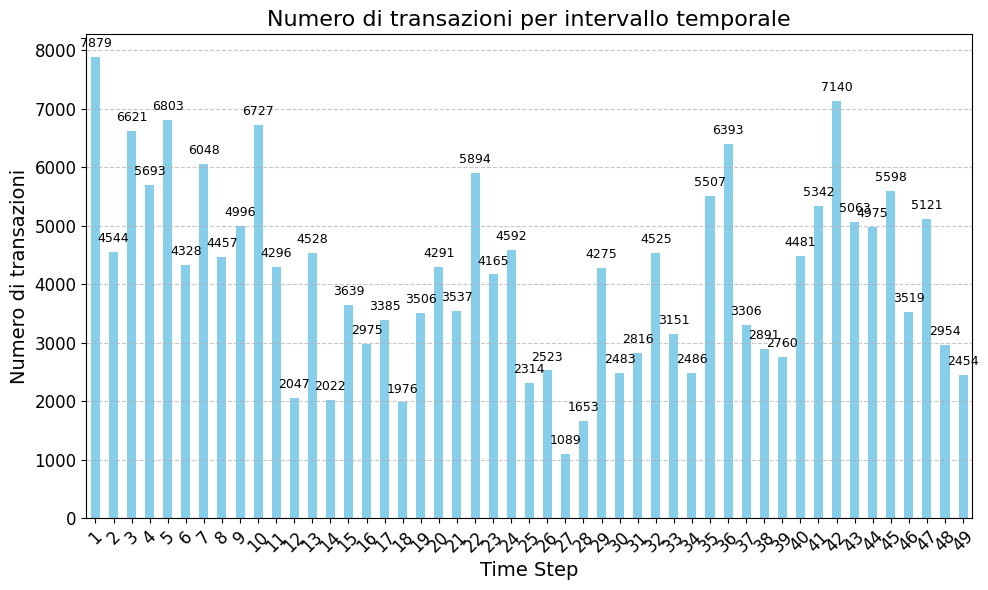

In [45]:
#rappresenta il numero di transazioni per ciascun "Time Step", ovvero per ciascun intervallo temporale nel dataset.

plt.figure(figsize=(10, 6))

# Plotting
ax = df_features["Time step"].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Numero di transazioni per intervallo temporale', fontsize=16)
plt.xlabel('Time Step', fontsize=14)
plt.ylabel('Numero di transazioni', fontsize=14)

# Customize ticks and labels
plt.xticks(rotation=45)
plt.tick_params(axis='both', which='major', labelsize=12)

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()


<Axes: >

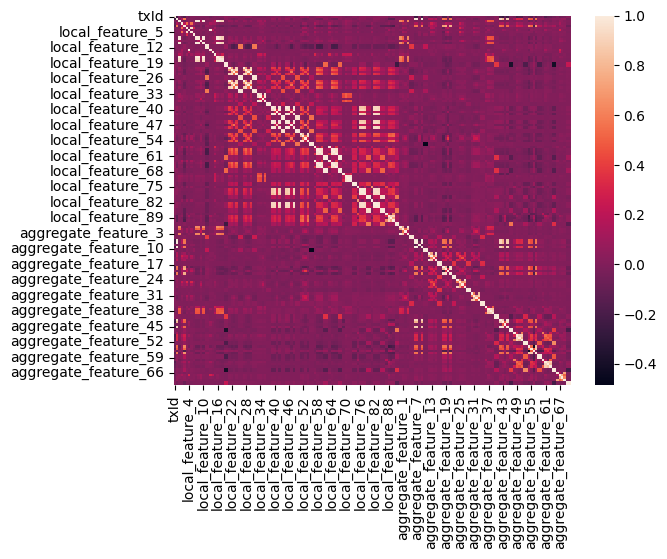

In [20]:
#visualizziamo rapidamente le relazioni tra le caratteristiche 
sns.heatmap(df_features.corr())

In [21]:
#combiniamo le informazioni per migliorare le analisi
df_merged = pd.merge(df_features, df_classes, on='txId', how='left')
df_merged.head()

df_merged.to_csv('df_merged.csv', index=False)

Text(0, 0.5, 'Numero di transazioni')

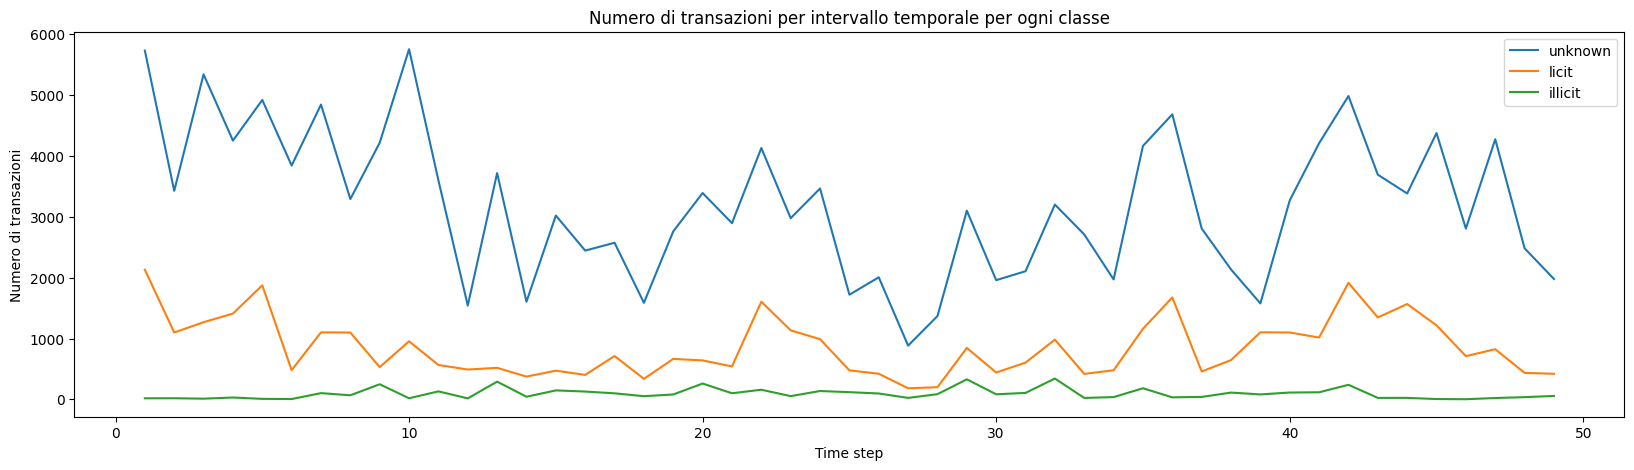

In [43]:
fig, ax = plt.subplots(figsize=(20, 5))
for class_ in df_classes['class'].unique():
    df_merged[df_merged['class'] == class_]['Time step'].value_counts().sort_index().plot(kind='line', ax=ax, label=class_)
plt.legend()
plt.title('Numero di transazioni per intervallo temporale per ogni classe')
plt.xlabel('Time step')
plt.ylabel('Numero di transazioni')

In [ ]:
#Calcolo il totale delle transazioni effettuate per ogni step temporale

def calculate_transactions_per_timestamp():
    # Inizializza un dizionario per memorizzare il numero di transazioni illecite e lecite per ogni timestamp
    transactions_per_timestamp = {}

    # Itera su tutti gli intervalli temporali
    for timestep in range(1, 50):
        # Seleziona le transazioni illecite per l'intervallo temporale specificato
        illicit_ids = df_merged.loc[(df_merged['Time step'] == timestep) & (df_merged['class'] == 'illicit'), 'txId']
        illicit_transactions = len(illicit_ids)

        # Seleziona le transazioni lecite per l'intervallo temporale specificato
        licit_ids = df_merged.loc[(df_merged['Time step'] == timestep) & (df_merged['class'] == 'licit'), 'txId']
        licit_transactions = len(licit_ids)

        # Aggiungi il numero di transazioni illecite e lecite al dizionario per il timestamp corrente
        transactions_per_timestamp[timestep] = (licit_transactions, illicit_transactions)

    return transactions_per_timestamp

# Esegui la funzione per calcolare il numero di transazioni illecite e lecite per ogni timestamp
transactions_per_timestamp = calculate_transactions_per_timestamp()

# Trova il timestamp con il maggior numero di transazioni illecite e lecite e quello con il minor numero
max_illicit_timestamp = max(transactions_per_timestamp, key=lambda x: transactions_per_timestamp[x][1])
min_illicit_timestamp = min(transactions_per_timestamp, key=lambda x: transactions_per_timestamp[x][1])
max_licit_timestamp = max(transactions_per_timestamp, key=lambda x: transactions_per_timestamp[x][0])
min_licit_timestamp = min(transactions_per_timestamp, key=lambda x: transactions_per_timestamp[x][0])

# Stampare il risultato
for timestamp, transactions in transactions_per_timestamp.items():
    print(f"Timestamp {timestamp}: Transazioni lecite: {transactions[0]}, Transazioni illecite: {transactions[1]}")

print("Timestamp con il maggior numero di transazioni illecite:", max_illicit_timestamp, transactions_per_timestamp[max_illicit_timestamp])
print("Timestamp con il minor numero di transazioni illecite:", min_illicit_timestamp, transactions_per_timestamp[min_illicit_timestamp])
print("Timestamp con il maggior numero di transazioni lecite:", max_licit_timestamp, transactions_per_timestamp[max_licit_timestamp])
print("Timestamp con il minor numero di transazioni lecite:", min_licit_timestamp, transactions_per_timestamp[min_licit_timestamp])



Timestamp 1: Transazioni lecite: 2130, Transazioni illecite: 17
Timestamp 2: Transazioni lecite: 1099, Transazioni illecite: 18
Timestamp 3: Transazioni lecite: 1268, Transazioni illecite: 11
Timestamp 4: Transazioni lecite: 1410, Transazioni illecite: 30
Timestamp 5: Transazioni lecite: 1874, Transazioni illecite: 8
Timestamp 6: Transazioni lecite: 480, Transazioni illecite: 5
Timestamp 7: Transazioni lecite: 1101, Transazioni illecite: 102
Timestamp 8: Transazioni lecite: 1098, Transazioni illecite: 67
Timestamp 9: Transazioni lecite: 530, Transazioni illecite: 248
Timestamp 10: Transazioni lecite: 954, Transazioni illecite: 18
Timestamp 11: Transazioni lecite: 565, Transazioni illecite: 131
Timestamp 12: Transazioni lecite: 490, Transazioni illecite: 16
Timestamp 13: Transazioni lecite: 518, Transazioni illecite: 291
Timestamp 14: Transazioni lecite: 374, Transazioni illecite: 43
Timestamp 15: Transazioni lecite: 471, Transazioni illecite: 147
Timestamp 16: Transazioni lecite: 402, 

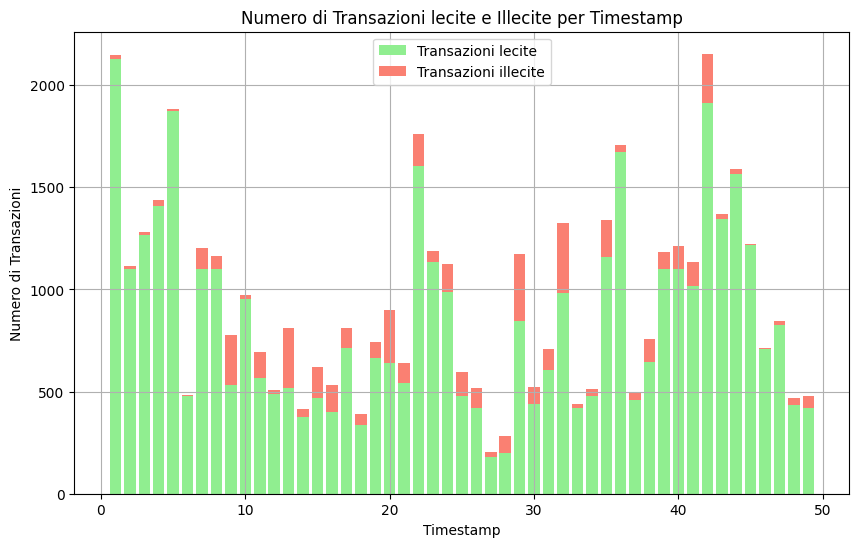

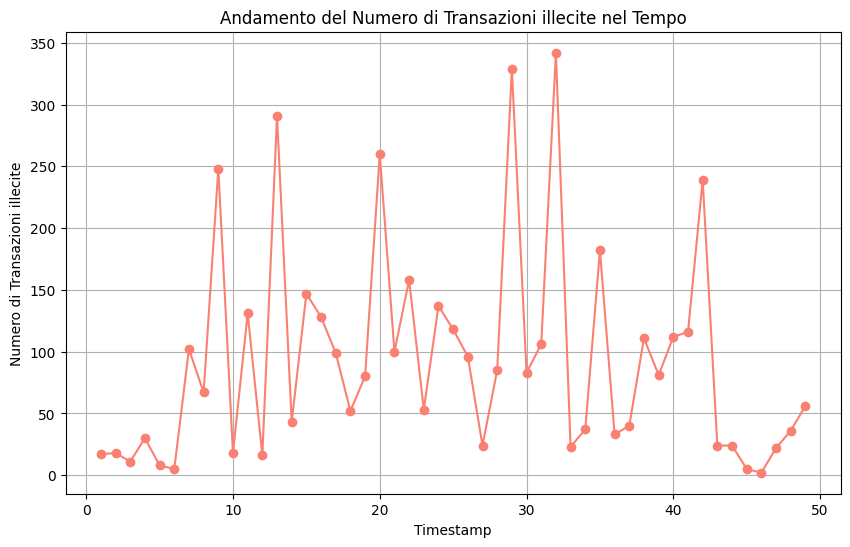

In [50]:
# Esegui la funzione per calcolare il numero di transazioni illecite e lecite per ogni timestamp
transactions_per_timestamp = calculate_transactions_per_timestamp()

# Trova il timestamp con il maggior numero di transazioni illecite e lecite e quello con il minor numero
max_illicit_timestamp = max(transactions_per_timestamp, key=lambda x: transactions_per_timestamp[x][1])
min_illicit_timestamp = min(transactions_per_timestamp, key=lambda x: transactions_per_timestamp[x][1])
max_licit_timestamp = max(transactions_per_timestamp, key=lambda x: transactions_per_timestamp[x][0])
min_licit_timestamp = min(transactions_per_timestamp, key=lambda x: transactions_per_timestamp[x][0])

# Estrai i dati per i grafici
timestamps = list(transactions_per_timestamp.keys())
licit_transactions = [transactions_per_timestamp[ts][0] for ts in timestamps]
illicit_transactions = [transactions_per_timestamp[ts][1] for ts in timestamps]

# Grafico a barre per il numero di transazioni lecite e illecite per ogni timestamp
plt.figure(figsize=(10, 6))
plt.bar(timestamps, licit_transactions, color='lightgreen', label='Transazioni lecite')
plt.bar(timestamps, illicit_transactions, color='salmon', label='Transazioni illecite', bottom=licit_transactions)
plt.xlabel('Timestamp')
plt.ylabel('Numero di Transazioni')
plt.title('Numero di Transazioni lecite e Illecite per Timestamp')
plt.legend()
plt.grid(True)
plt.show()

# Grafico a linea per mostrare l'andamento del numero di transazioni illecite nel tempo
plt.figure(figsize=(10, 6))
plt.plot(timestamps, illicit_transactions, marker='o', color='salmon', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Numero di Transazioni illecite')
plt.title('Andamento del Numero di Transazioni illecite nel Tempo')
plt.grid(True)
plt.show()


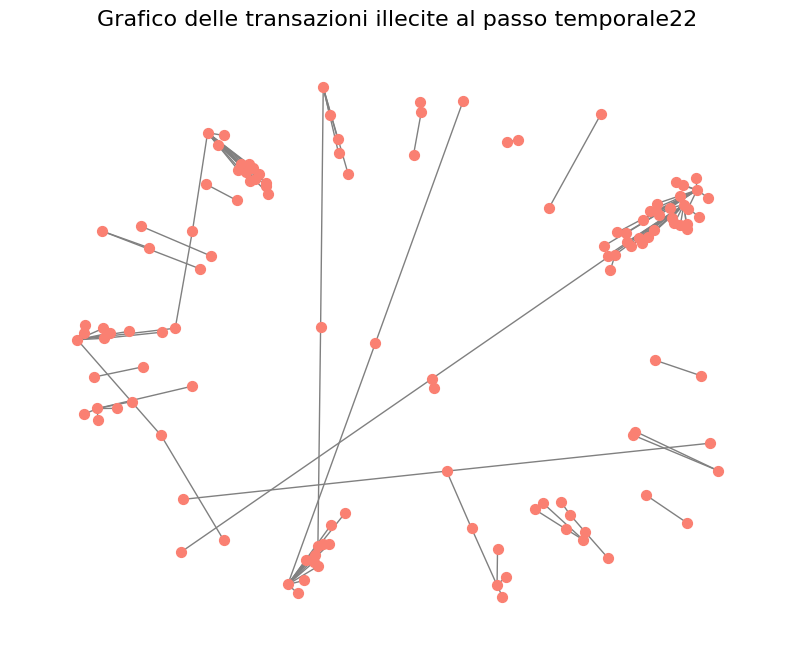

In [48]:
#creo un grafico delle transazioni illecite che si verificano in quel momento specifico 
def illicit_ids_graph_timestep(timestep):
    # Selezione delle transazioni illecite per l'intervallo temporale specificato
    illicit_ids = df_merged.loc[(df_merged['Time step'] == timestep) & (df_merged['class'] == 'illicit'), 'txId']
    illicit_edges = df_edgelist.loc[df_edgelist['txId1'].isin(illicit_ids)]

    # Creazione del grafo delle transazioni illecite
    graph = nx.from_pandas_edgelist(illicit_edges, source='txId1', target='txId2', create_using=nx.DiGraph())

    # Layout del grafo
    pos = nx.spring_layout(graph)

    # Tracciatura del grafo
    plt.figure(figsize=(10, 8))
    plt.title("Grafico delle transazioni illecite al passo temporale" + str(timestep), fontsize=16)
    nx.draw_networkx(graph, pos=pos, with_labels=False, node_size=50, node_color='salmon', edge_color='gray', arrows=False)

    # Mostra il grafico
    plt.axis('off')
    plt.show()

# Esegui la funzione per visualizzare il grafico delle transazioni illecite per l'intervallo temporale 22
illicit_ids_graph_timestep(22)

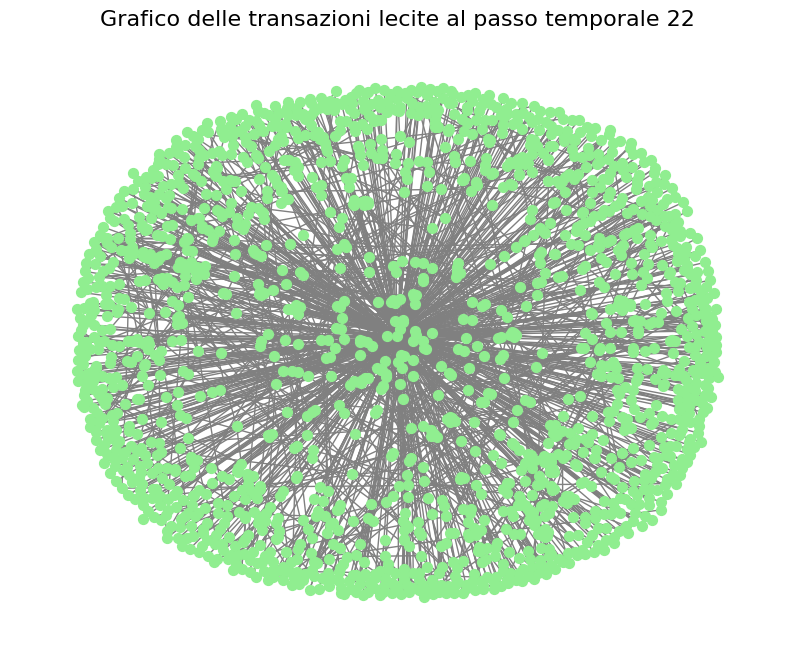

In [49]:
##creo un grafico delle transazioni lecite che si verificano in quel momento specifico 
def licit_ids_graph_timestep(timestep):
    # Selezione delle transazioni lecite per l'intervallo temporale specificato
    licit_ids = df_merged.loc[(df_merged['Time step'] == timestep) & (df_merged['class'] == 'licit'), 'txId']
    licit_edges = df_edgelist.loc[df_edgelist['txId1'].isin(licit_ids)]

    # Creazione del grafo delle transazioni lecite
    graph = nx.from_pandas_edgelist(licit_edges, source='txId1', target='txId2', create_using=nx.DiGraph())

    # Layout del grafo
    pos = nx.spring_layout(graph)

    # Tracciatura del grafo
    plt.figure(figsize=(10, 8))
    plt.title("Grafico delle transazioni lecite al passo temporale " + str(timestep), fontsize=16)
    nx.draw_networkx(graph, pos=pos, with_labels=False, node_size=50, node_color='lightgreen', edge_color='gray', arrows=False)

    # Mostra il grafico
    plt.axis('off')
    plt.show()

# Esegui la funzione per visualizzare il grafico delle transazioni lecite per l'intervallo temporale 22
licit_ids_graph_timestep(22)

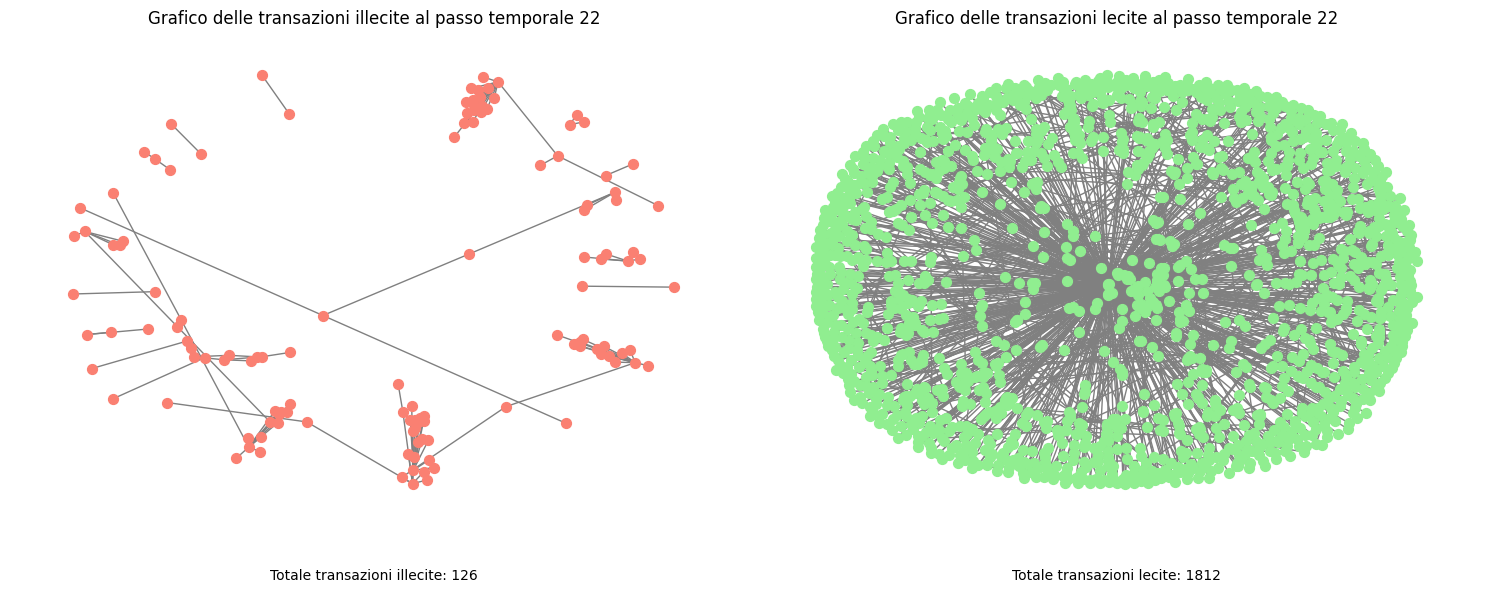

In [47]:
#Combino i due grafici per ottenere una rappresentazione visiva migliore

def combined_transactions_graph(timestep):
    # Selezione delle transazioni illecite per l'intervallo temporale specificato
    illicit_ids = df_merged.loc[(df_merged['Time step'] == timestep) & (df_merged['class'] == 'illicit'), 'txId']
    illicit_edges = df_edgelist.loc[df_edgelist['txId1'].isin(illicit_ids)]

    # Selezione delle transazioni lecite per l'intervallo temporale specificato
    licit_ids = df_merged.loc[(df_merged['Time step'] == timestep) & (df_merged['class'] == 'licit'), 'txId']
    licit_edges = df_edgelist.loc[df_edgelist['txId1'].isin(licit_ids)]

    # Creazione dei grafi delle transazioni illecite e lecite
    illicit_graph = nx.from_pandas_edgelist(illicit_edges, source='txId1', target='txId2', create_using=nx.DiGraph())
    licit_graph = nx.from_pandas_edgelist(licit_edges, source='txId1', target='txId2', create_using=nx.DiGraph())

    # Layout dei grafi
    pos_illicit = nx.spring_layout(illicit_graph)
    pos_licit = nx.spring_layout(licit_graph)

    # Calcolo del totale delle transazioni illecite e lecite
    total_illicit_transactions = len(illicit_graph.nodes())
    total_licit_transactions = len(licit_graph.nodes())

    # Creazione della figura con due sotto-plot
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    # Tracciatura del grafico delle transazioni illecite
    axs[0].set_title("Grafico delle transazioni illecite al passo temporale " + str(timestep))
    nx.draw_networkx(illicit_graph, ax=axs[0], pos=pos_illicit, with_labels=False, node_size=50, node_color='salmon', edge_color='gray', arrows=False)
    axs[0].axis('off')
    axs[0].text(0.5, -0.1, f"Totale transazioni illecite: {total_illicit_transactions}", horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

    # Tracciatura del grafico delle transazioni lecite
    axs[1].set_title("Grafico delle transazioni lecite al passo temporale " + str(timestep))
    nx.draw_networkx(licit_graph, ax=axs[1], pos=pos_licit, with_labels=False, node_size=50, node_color='lightgreen', edge_color='gray', arrows=False)
    axs[1].axis('off')
    axs[1].text(0.5, -0.1, f"Totale transazioni lecite: {total_licit_transactions}", horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

    # Mostra la figura
    plt.tight_layout()
    plt.show()

# Esegui la funzione per visualizzare i grafici delle transazioni illecite e lecite per l'intervallo temporale 22
combined_transactions_graph(22)
